## Optimal Climate Event Monetization

Name: David Parks  
Prepared: Fall 2019

### 1) Research Problem

As the number and strength of environmental events increases in the coming decades, these events will have secondary and tertiary affects on the financial markets. The demand for building materials, hotels, rental vehicles, and logistics should rise while insurance providers and other similiar industries will face growing economic hardship as the amount - both number and size - of claims increases. To test our hypothesis, our team will try to answer the following questions.

1. How do stock prices for these noted industries respond to environmental events?
2. Is there a statistically significant difference between the stock's growth rates before and after the event?
3. Is it possible to determine an optimal time to invest and/or divest in these industries?

To answer these questions, we will compare growth rates for a basket of stocks that represent the largest companies by revenue in the car rental, logistics, building materials, hotel, and insurance industries at +/- 6-month time intervals around the environmental event. We will focus on four specific events - two hurricanes and two wildfires.

### 2) Data Collection

We collected two-and-a-half years of stock closing prices from January 03, 2017 to July 01, 2019 for the selected stocks.

| Rental Car | Logistics     | Building Materials    | Hotels   | Insurance  |
|------------|---------------|-----------------------|----------|------------|
| Hertz      | XPO Logistics | Home Depot            | Hyatt    | Allstate   |
| Avis       | J.B. Hunt     | Lowes                 | Marriott | Travelers  |
|            | UPS           | Walmart               | Hilton   | Chubb      |
|            | DHL           | Builders First Source | Accor    | Erie       |

We also collected the dates for hurricanes Maria and Harvey, and the California "Camp"  and "Carr" wildfires.

In [1]:
# import necessary libraries
from datetime import timedelta, date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas_datareader import data
from scipy import stats
import seaborn; seaborn.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We start by creating lists for the stocks that we will analyze. We collected these stocks based on research that shows car rental, logisitcs, building materials, hotels, and insurance industries are the most affected when natural disasters hit. 

In [2]:
# list of stock names by category
stocknames = ['Hertz', 'Avis',                                          # car rental
              'XPO_Logistics', 'J_B_Hunt', 'UPS', 'DHL',                # logistics
              'Home_Depot', 'Lowes', 'Walmart', 'Builders_FS',          # building materials
              'Hyatt', 'Marriott', 'Hilton', 'Accor',                   # hotels
              'Allstate', 'Travelers', 'Chubb', 'Erie']                 # insurance

# lists of stock names by sector
car_rental = stocknames[:2]
logistics = stocknames[2:6]
building_materials = stocknames[6:10]
hotels = stocknames[10:14]
insurance = stocknames[14:]

# list of stock ticker symbols
stocktickers = ['HTZ', 'CAR',                                           # car rental
                'XPO', 'JBHT', 'UPS', 'DPSGY',                          # logistics
                'HD', 'LOW', 'WMT', 'BLDR',                             # building materials
                'H', 'MAR', 'HLT', 'ACCYY',                             # hotels
                'ALL', 'TRV', 'CB', 'ERIE']                             # insurance

We create a list comprehension that iterates through all the stock tickers, retrieves their closing prices from January 2017 to July 2019, and creates a dataframe of these values indexed by date. We used Yahoo! finance as our data source.

In [3]:
# get the closing prices of each stock from January 03, 2017 to July 01, 2019 
closing_prices = [data.DataReader(stock, start='2017', end='2019-07-01', data_source='yahoo')['Close']
                  for stock in stocktickers]
closing_prices = pd.concat(closing_prices, axis=1, sort=False)
closing_prices.columns = stocknames
closing_prices

Hertz       Avis  XPO_Logistics   J_B_Hunt         UPS  \
Date                                                                     
2017-01-03  19.565596  37.470001      43.700001  96.769997  115.080002   
2017-01-04  20.529974  37.380001      45.139999  97.820000  115.110001   
2017-01-05  20.382277  35.950001      43.709999  97.190002  115.169998   
2017-01-06  20.234579  36.389999      43.680000  97.690002  115.400002   
2017-01-09  19.774109  35.209999      43.290001  96.870003  114.769997   
...               ...        ...            ...        ...         ...   
2019-06-26  16.139999  34.599998      53.529999  88.349998   99.970001   
2019-06-27  16.549999  34.840000      55.060001  89.690002  101.699997   
2019-06-28  15.960000  35.160000      57.810001  91.410004  103.269997   
2019-07-01  15.660000  34.950001      57.090000  91.239998  102.970001   
2019-07-02  15.450000  34.470001      56.200001  90.269997  102.000000   

                  DHL  Home_Depot       Lowes     Walmart  Builders_FS  \
Date                                                                     
2017-01-03  32.799999  134.309998   70.949997   68.660004    11.640000   
2017-01-04  32.810001  135.500000   71.809998   69.059998    12.020000   
2017-01-05  33.750000  133.899994   71.070000   69.209999    11.760000   
2017-01-06  33.650002  133.529999   70.949997   68.260002    11.370000   
2017-01-09  33.410000  134.309998   71.070000   68.709999    11.260000   
...               ...         ...         ...         ...          ...   
2019-06-26  32.029999  206.419998   99.239998  110.160004    15.370000   
2019-06-27  32.240002  207.020004   99.360001  110.099998    16.250000   
2019-06-28  32.790001  207.970001  100.910004  110.489998    16.860001   
2019-07-01  32.840000  210.279999  102.199997  110.620003    16.959999   
2019-07-02  33.040001  210.139999  102.690002  111.599998    16.980000   

                Hyatt    Marriott      Hilton  Accor    Allstate   Travelers  \
Date                                                                           
2017-01-03  55.900002   82.500000   56.204281   7.55   74.169998  120.900002   
2017-01-04  56.040001   82.339996   58.000000   7.78   74.370003  120.250000   
2017-01-05  55.250000   81.779999   57.320000   8.01   74.029999  118.330002   
2017-01-06  54.970001   82.300003   57.470001   7.92   74.150002  118.269997   
2017-01-09  54.779999   82.250000   56.959999   8.02   73.089996  117.320000   
...               ...         ...         ...    ...         ...         ...   
2019-06-26  73.550003  135.649994   94.519997   8.49   99.489998  148.699997   
2019-06-27  75.160004  138.289993   96.529999   8.49  100.139999  149.199997   
2019-06-28  76.129997  140.289993   97.739998   8.40  101.690002  149.520004   
2019-07-01  76.709999  141.229996   99.300003   8.62  103.150002  151.419998   
2019-07-02  76.510002  141.259995  100.389999   8.47  103.269997  152.830002   

                 Chubb        Erie  
Date                                
2017-01-03  131.710007  111.930000  
2017-01-04  131.520004  112.320000  
2017-01-05  130.630005  111.900002  
2017-01-06  131.330002  112.239998  
2017-01-09  130.509995  111.309998  
...                ...         ...  
2019-06-26  147.000000  250.000000  
2019-06-27  147.160004  249.889999  
2019-06-28  147.289993  254.279999  
2019-07-01  147.839996  256.279999  
2019-07-02  148.419998  258.989990  

[628 rows x 18 columns]

Next we create a group of Pandas DatetimeIndex objects that represent the environmental events.

| Event Type       | Name   | Start Date         | End Date          |
|------------------|--------|--------------------|-------------------|
| Wildfire         | Camp   | November 8, 2018   | November 25, 2018 |
| Wildfire         | Carr   | July 23, 2018      | August 30, 2018   |
| Hurricane        | Maria  | September 16, 2017 | October 2, 2017   |
| Hurricane        | Harvey | August 17, 2017    | September 2, 2017 |

In [4]:
# California "Camp" wildfire
camp_fire_dates = pd.bdate_range('2018-11-08', '2018-11-25')

# California "Carr" wildfire
carr_fire_dates = pd.bdate_range('2018-07-23', '2018-08-30')

# Hurricane Maria
maria_hurricane_dates = pd.bdate_range('2017-09-16', '2017-10-02')

# Hurricane Harvey
harvey_hurricane_dates = pd.bdate_range('2017-08-17', '2017-09-02')

We then create DatetimeIndex objects that represent 180-day periods before and after the event. Since our index only includes business days, substracting 125 from the first day of the event index and adding 125 to the last day of the event index returns the desired result.

In [5]:
# California "Camp" wildfire
camp_fire_6months_before = camp_fire_dates[0] + np.arange(-125, 0)
camp_fire_6months_after = camp_fire_dates[-1] + np.arange(0, 125)

# California "Carr" wildfire
carr_fire_6months_before = carr_fire_dates[0] + np.arange(-125, 0)
carr_fire_6months_after = carr_fire_dates[-1] + np.arange(0, 125)

# Hurricane Maria
maria_hurr_6months_before = maria_hurricane_dates[0] + np.arange(-125, 0)
maria_hurr_6months_after = maria_hurricane_dates[-1] + np.arange(0, 125)

# Hurricane Harvey
harvey_hurr_6months_before = harvey_hurricane_dates[0] + np.arange(-125, 0)
harvey_hurr_6months_after = harvey_hurricane_dates[-1] + np.arange(0, 125)

### 3) Data Analysis

To determine the optimal time to buy and sell the selected stocks, we need to find the periods of maximum growth both before and after the event.  

To find the optimal time to buy, we wrote a function that uses a list comprehension to calculate the retroactive growth rate starting with the first and last day of the period. It then iterates through the days calculating the growth rate using the second and last day, the third and last day, etc. The result is a series of growth rates that depict the return on investment an investor would have received had they purchased the stock $n$ days before the event. The day the maximum growth rate occurs is the optimal day to buy.

In [6]:
def backward_growth_rate(column):
    last_day = column[-1]
    rates = [((first_day - last_day) / first_day) * 100 for first_day in column]
    return pd.Series(rates, index=column.index)

To find the optimal time to sell, we wrote a function that uses a list comprehension to calculate the forward growth rate starting with the first day of the period. It then iterates through the days calculating the growth rate using the first and second day, the first and third day, etc. The result is a series of growth rates that depict the return on investment an investor would receive if they held the stock for $n$ days after the event. The day the maximum growth rate occurs is the optimal day to sell.

In [7]:
def forward_growth_rate(column):
    first_day = column[0]
    rates = [((first_day - last_day) / first_day) * 100 for last_day in column]
    return pd.Series(rates, index=column.index)

#### Visualizing the "Camp" fire growth rates by sector.

In [8]:
# select the stock prices before and after the fire
before1 = closing_prices.loc[camp_fire_6months_before]
after1 = closing_prices.loc[camp_fire_6months_after]

# apply the growth rate functions
before_growth_rate1 = before1.apply(backward_growth_rate)
after_growth_rate1 = after1.apply(forward_growth_rate)

Determine the optimal days to buy and sell car rental stocks.

In [9]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(camp_fire_dates[0] - before_growth_rate1[car_rental].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate1[car_rental].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate1[car_rental].idxmax() - camp_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate1[car_rental].max())

Optimal number of days before the event to purchase the stock.
Hertz    79 days
Avis    175 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    23.765574
Avis     27.039103
dtype: float64 

Optimal number of days after the event to sell the stock.
Hertz   31 days
Avis    41 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    27.759562
Avis     22.408262
dtype: float64


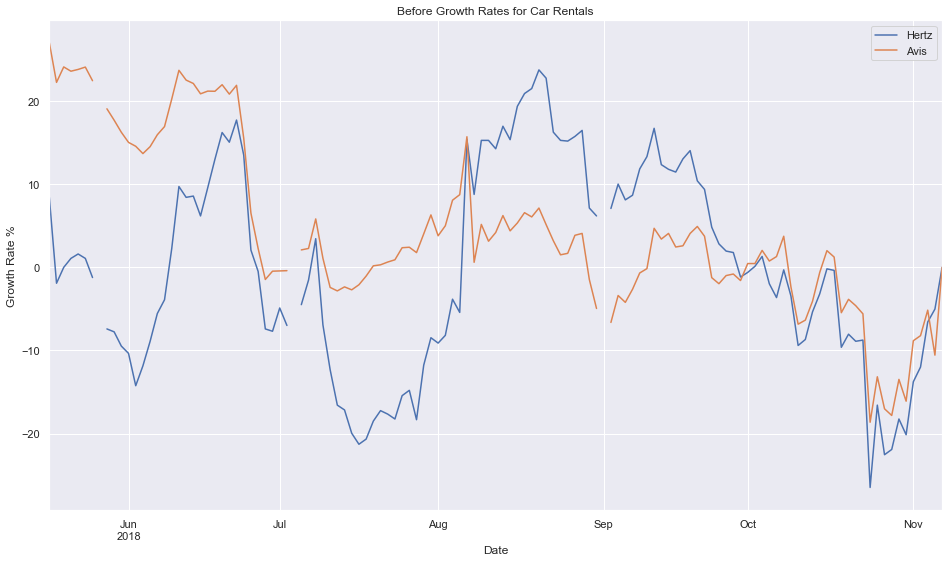

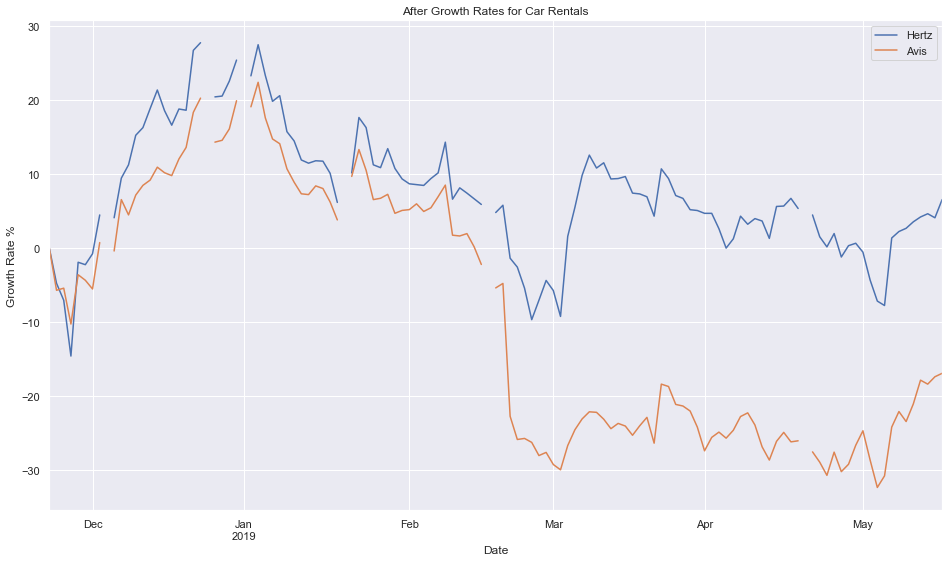

In [10]:
# plot the before growth rates for car rentals
before_growth_rate1[car_rental].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Car Rentals')

# plot the after growth rates for car rentals
after_growth_rate1[car_rental].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Car Rentals');

Determine the optimal days to buy and sell logistics stocks.

In [11]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(camp_fire_dates[0] - before_growth_rate1[logistics].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate1[logistics].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate1[logistics].idxmax() - camp_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate1[logistics].max())

Optimal number of days before the event to purchase the stock.
XPO_Logistics    42 days
J_B_Hunt        149 days
UPS              64 days
DHL             170 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    23.197136
J_B_Hunt         15.104731
UPS              10.853526
DHL              18.044180
dtype: float64 

Optimal number of days after the event to sell the stock.
XPO_Logistics   20 days
J_B_Hunt        31 days
UPS             31 days
DHL             31 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    38.416830
J_B_Hunt         15.880851
UPS              17.296902
DHL              14.672185
dtype: float64


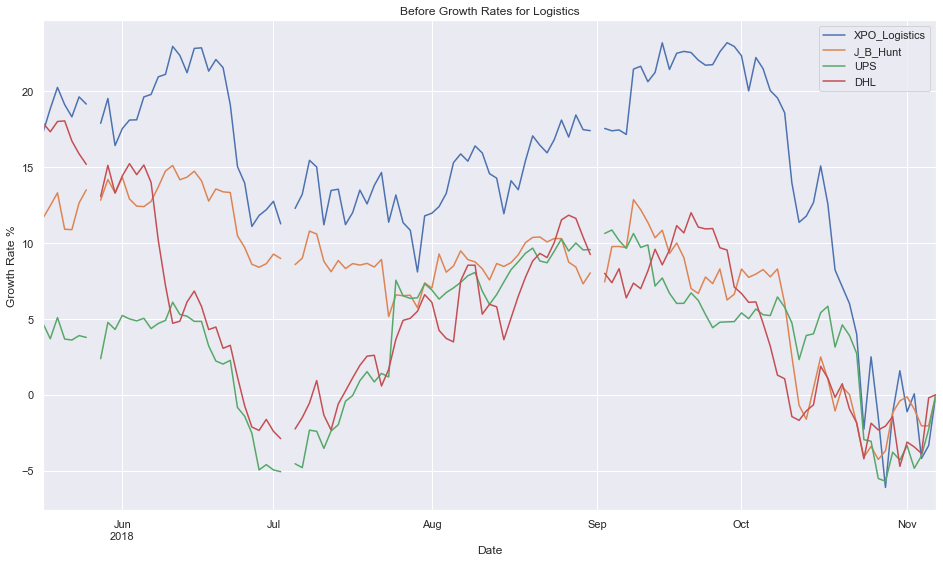

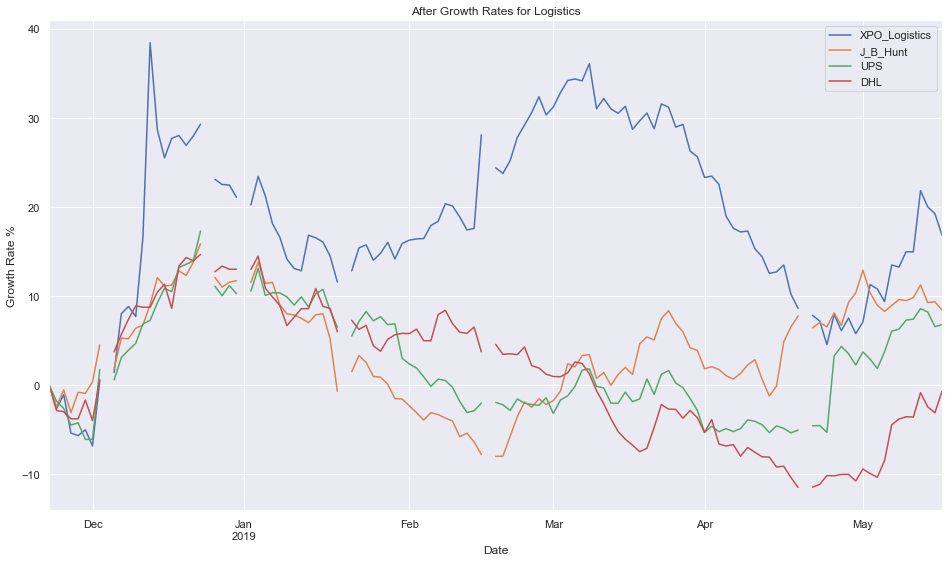

In [12]:
# plot the before growth rates for logistics
before_growth_rate1[logistics].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Logistics')

# plot the after growth rates for logistics
after_growth_rate1[logistics].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Logistics');

Determine the optimal days to buy and sell building materials stocks.

In [13]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(camp_fire_dates[0] - before_growth_rate1[building_materials].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate1[building_materials].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate1[building_materials].idxmax() - camp_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate1[building_materials].max())

Optimal number of days before the event to purchase the stock.
Home_Depot     58 days
Lowes          48 days
Walmart         1 days
Builders_FS   149 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot     12.447982
Lowes          13.899348
Walmart         0.000000
Builders_FS    34.472800
dtype: float64 

Optimal number of days after the event to sell the stock.
Home_Depot    31 days
Lowes         31 days
Walmart       31 days
Builders_FS   31 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot      6.342912
Lowes           2.106820
Walmart         9.758148
Builders_FS    20.820437
dtype: float64


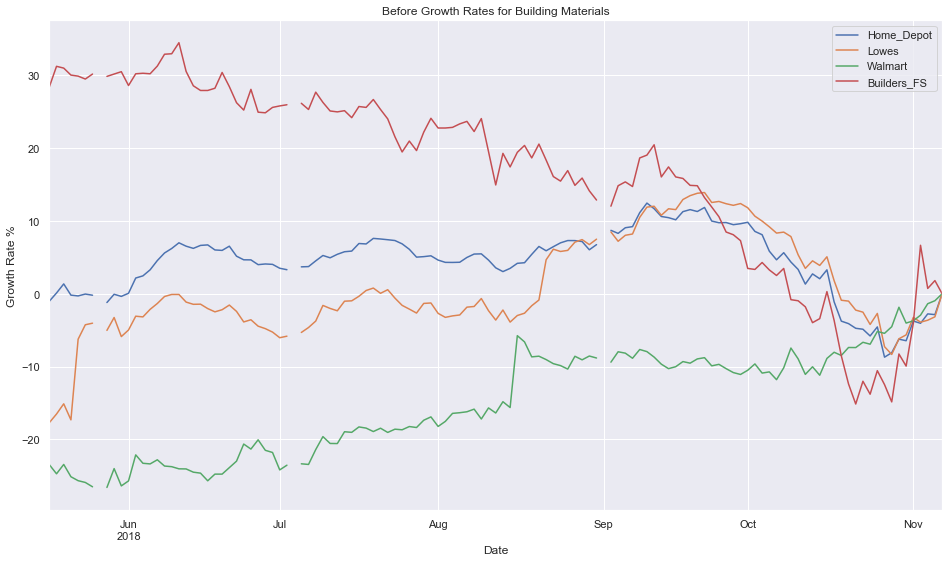

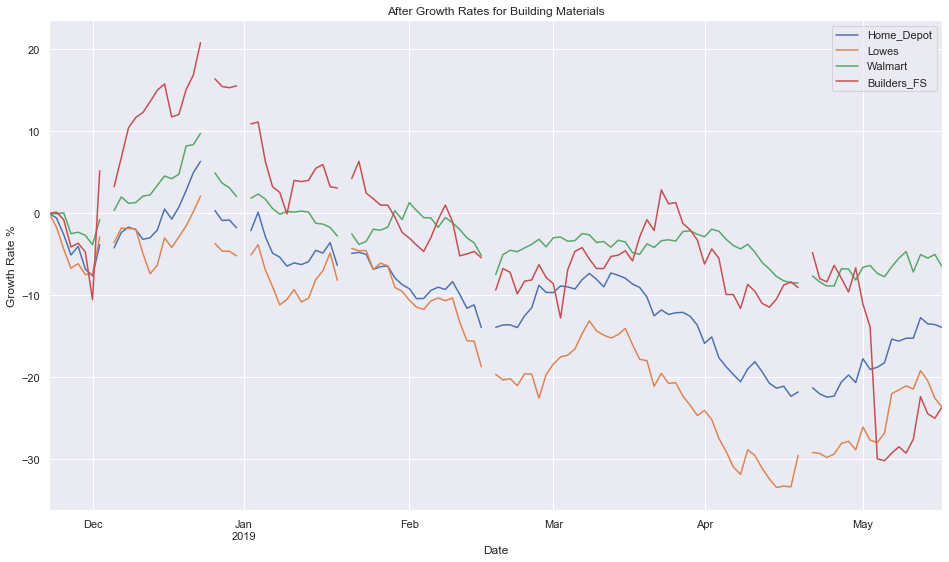

In [14]:
# plot the before growth rates for building materials
before_growth_rate1[building_materials].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Building Materials')

# plot the after growth rates for building materials
after_growth_rate1[building_materials].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Building Materials');

Determine the optimal days to buy and sell hotel stocks.

In [15]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(camp_fire_dates[0] - before_growth_rate1[hotels].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate1[hotels].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate1[hotels].idxmax() - camp_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate1[hotels].max())

Optimal number of days before the event to purchase the stock.
Hyatt      157 days
Marriott   155 days
Hilton     155 days
Accor      171 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt       15.254035
Marriott    17.962850
Hilton      13.828530
Accor       18.388795
dtype: float64 

Optimal number of days after the event to sell the stock.
Hyatt       31 days
Marriott    31 days
Hilton      28 days
Accor      171 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt        9.222191
Marriott    13.875153
Hilton       9.094641
Accor       12.570783
dtype: float64


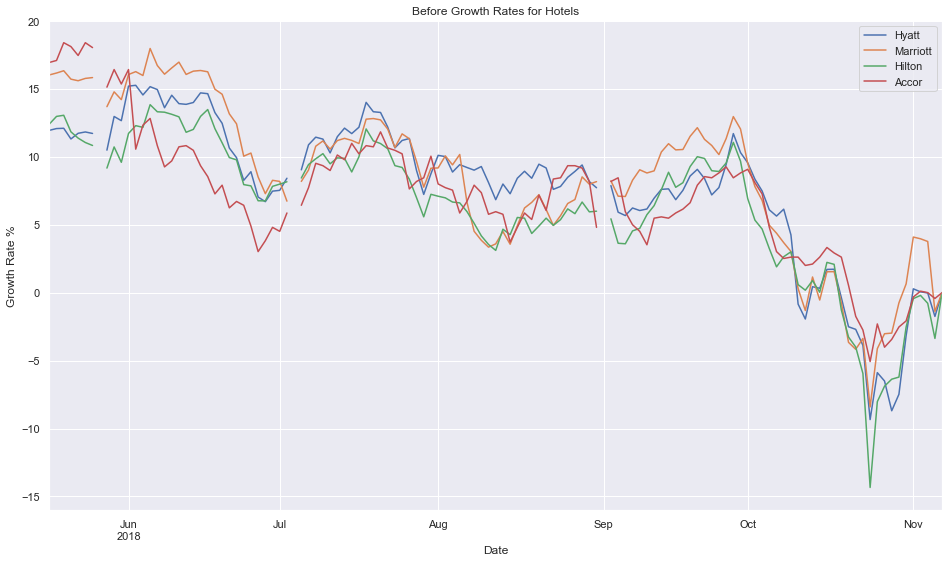

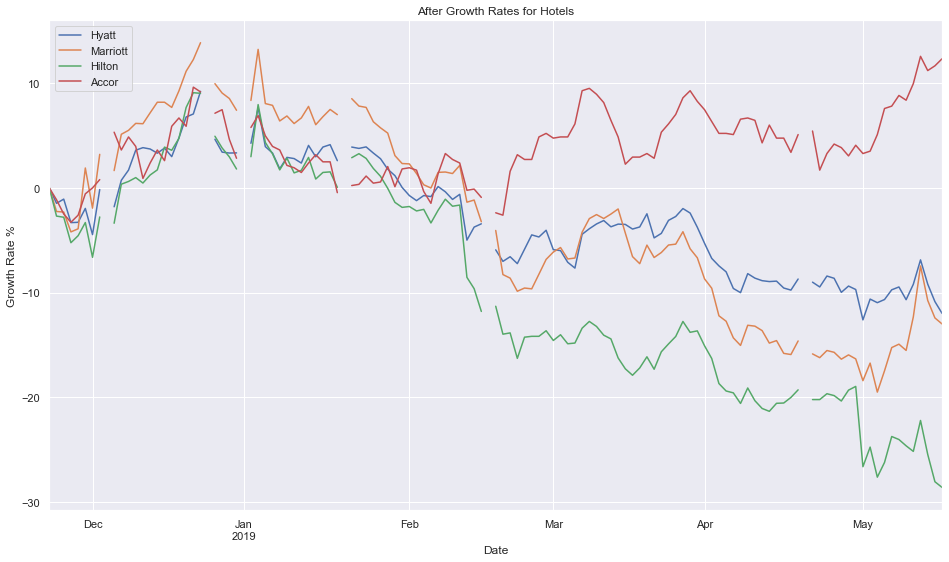

In [16]:
# plot the before growth rates for hotels
before_growth_rate1[hotels].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Hotels')

# plot the after growth rates for hotels
after_growth_rate1[hotels].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Hotels');

Determine the optimal days to buy and sell insurance stocks.

In [17]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(camp_fire_dates[0] - before_growth_rate1[insurance].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate1[insurance].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate1[insurance].idxmax() - camp_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate1[insurance].max())

Optimal number of days before the event to purchase the stock.
Allstate    49 days
Travelers   48 days
Chubb       50 days
Erie         1 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     9.320790
Travelers    3.094320
Chubb        6.016267
Erie         0.000000
dtype: float64 

Optimal number of days after the event to sell the stock.
Allstate    31 days
Travelers   31 days
Chubb       31 days
Erie        31 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     11.922953
Travelers    11.034756
Chubb         8.468506
Erie          6.144581
dtype: float64


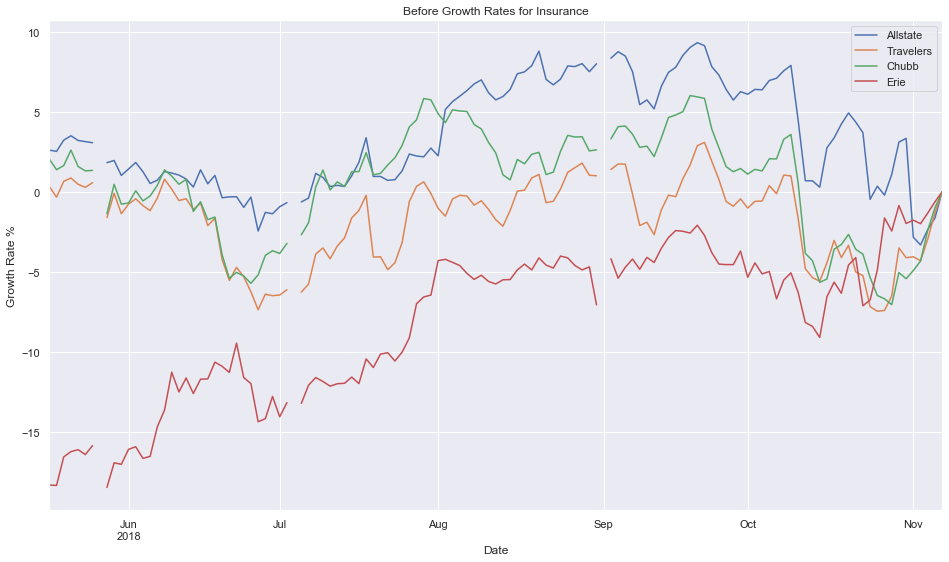

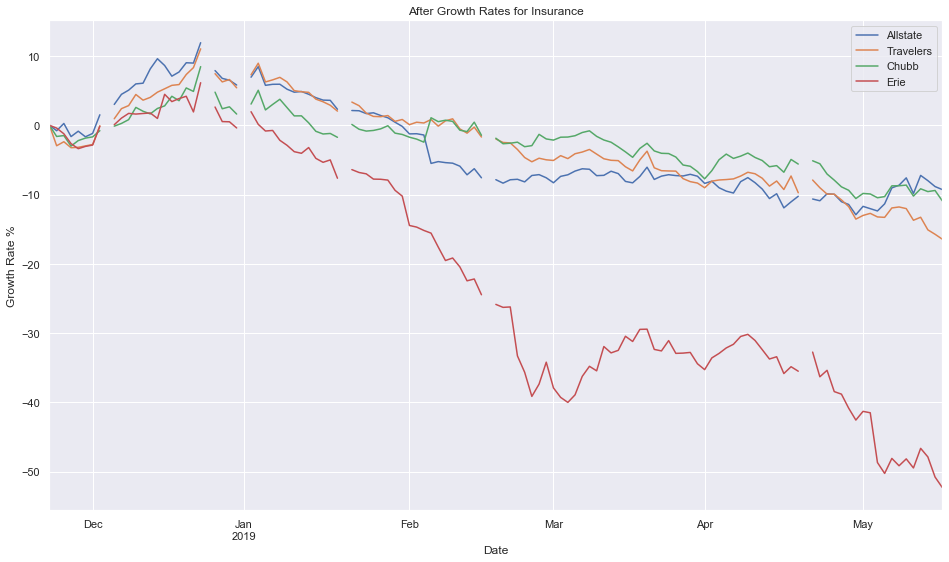

In [18]:
# plot the before growth rates for insurance
before_growth_rate1[insurance].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Insurance')

# plot the after growth rates for insurance
after_growth_rate1[insurance].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Insurance');

#### Visualizing the "Carr" fire growth rates by sector.

In [19]:
# select the stock prices before and after the fire
before2 = closing_prices.loc[carr_fire_6months_before]
after2 = closing_prices.loc[carr_fire_6months_after]

# apply the growth rate functions
before_growth_rate2 = before2.apply(backward_growth_rate)
after_growth_rate2 = after2.apply(forward_growth_rate)

Determine the optimal days to buy and sell car rental stocks.

In [20]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(carr_fire_dates[0] - before_growth_rate2[car_rental].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate2[car_rental].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate2[car_rental].idxmax() - carr_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate2[car_rental].max())

Optimal number of days before the event to purchase the stock.
Hertz   175 days
Avis    125 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    41.242699
Avis     34.955311
dtype: float64 

Optimal number of days after the event to sell the stock.
Hertz    55 days
Avis    126 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    26.587973
Avis     32.318209
dtype: float64


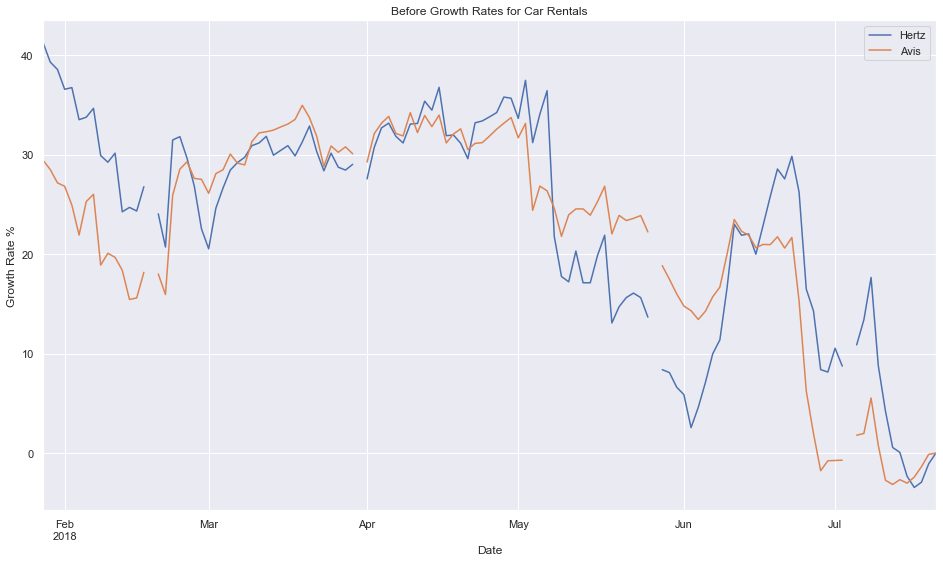

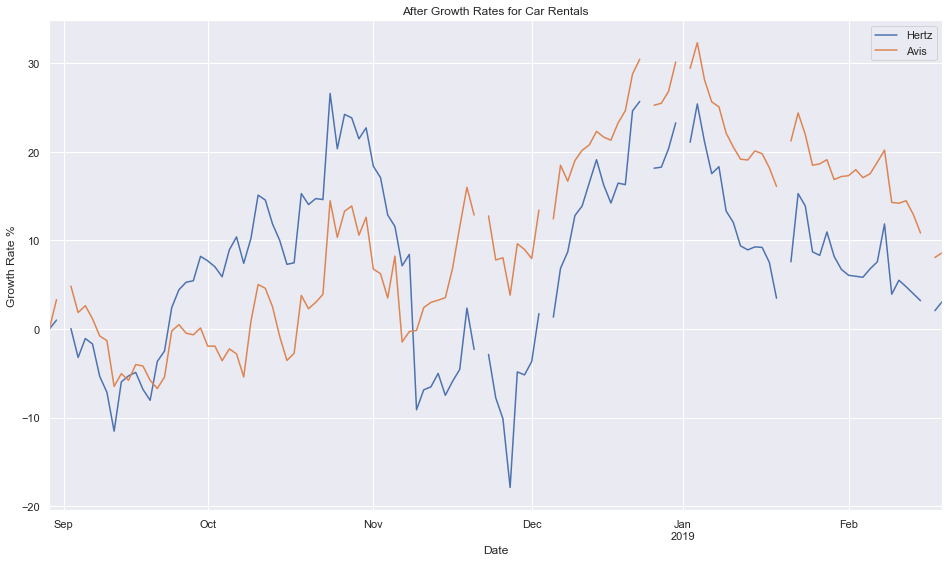

In [21]:
# plot the before growth rates for car rentals 
before_growth_rate2[car_rental].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Car Rentals')

# plot the after growth rates for car rentals
after_growth_rate2[car_rental].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Car Rentals');

Determine the optimal days to buy and sell logistics stocks.

In [22]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(carr_fire_dates[0] - before_growth_rate2[logistics].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate2[logistics].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate2[logistics].idxmax() - carr_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate2[logistics].max())

Optimal number of days before the event to purchase the stock.
XPO_Logistics    41 days
J_B_Hunt         41 days
UPS             175 days
DHL             175 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    10.632334
J_B_Hunt          7.307755
UPS              14.214635
DHL              29.507171
dtype: float64 

Optimal number of days after the event to sell the stock.
XPO_Logistics   105 days
J_B_Hunt        116 days
UPS             116 days
DHL             116 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    58.251242
J_B_Hunt         25.991153
UPS              26.829466
DHL              27.245589
dtype: float64


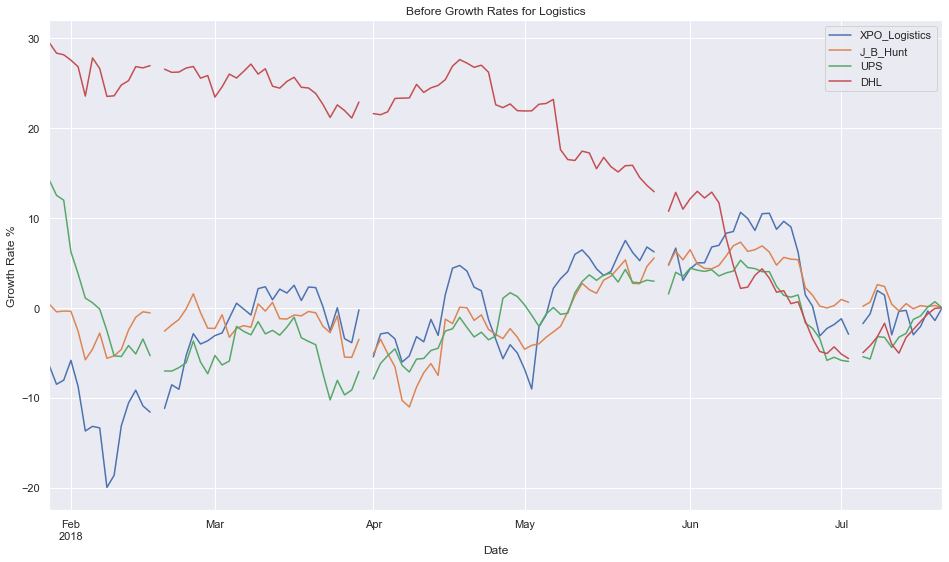

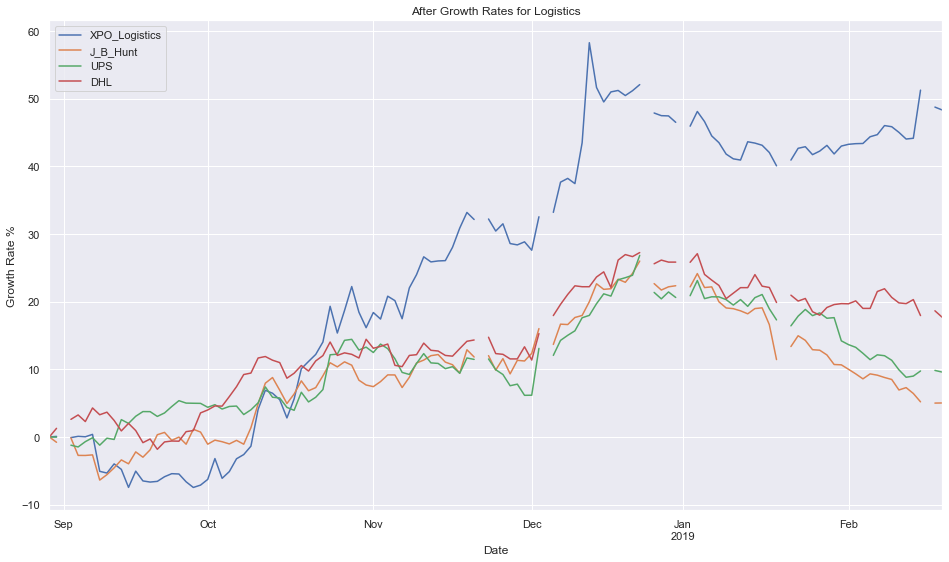

In [23]:
# plot the before growth rates for logistics
before_growth_rate2[logistics].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Logistics')

# plot the after growth rates for logistics
after_growth_rate2[logistics].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Logistics');

Determine the optimal days to buy and sell building materials stocks.

In [24]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(carr_fire_dates[0] - before_growth_rate2[building_materials].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate2[building_materials].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate2[building_materials].idxmax() - carr_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate2[building_materials].max())

Optimal number of days before the event to purchase the stock.
Home_Depot    175 days
Lowes         175 days
Walmart       175 days
Builders_FS   172 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot      1.205349
Lowes           5.784344
Walmart        19.616618
Builders_FS    16.803655
dtype: float64 

Optimal number of days after the event to sell the stock.
Home_Depot    116 days
Lowes         116 days
Walmart       116 days
Builders_FS   116 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot     20.636353
Lowes          20.318872
Walmart        10.697189
Builders_FS    35.457418
dtype: float64


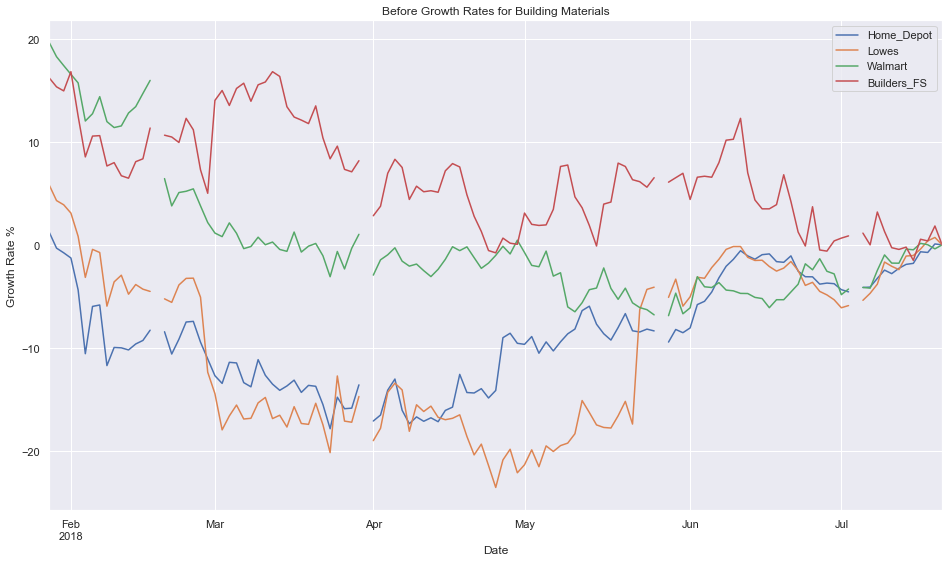

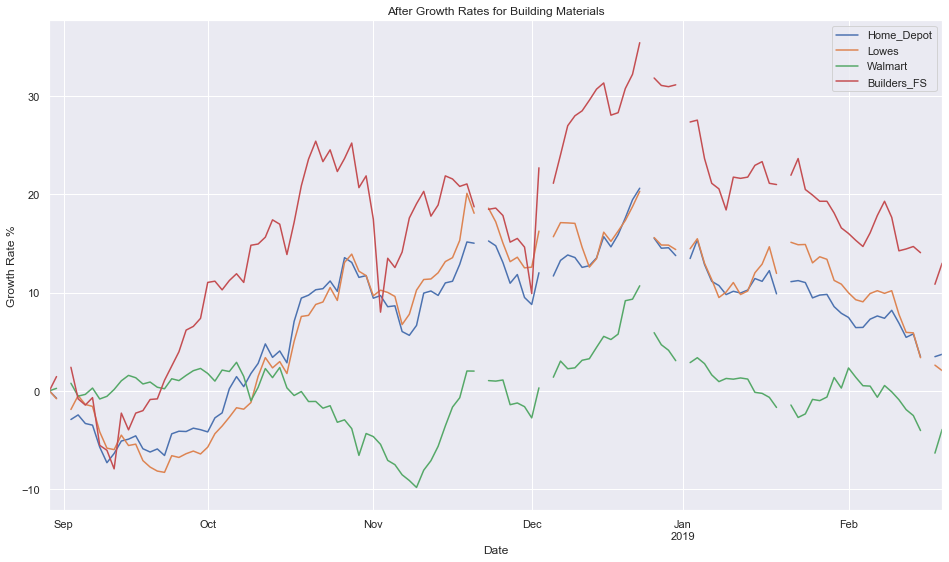

In [25]:
# plot the before growth rates for building materials
before_growth_rate2[building_materials].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Building Materials')

# plot the after growth rates for building materials
after_growth_rate2[building_materials].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Building Materials');

Determine the optimal days to buy and sell hotel stocks.

In [26]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(carr_fire_dates[0] - before_growth_rate2[hotels].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate2[hotels].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate2[hotels].idxmax() - carr_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate2[hotels].max())

Optimal number of days before the event to purchase the stock.
Hyatt       49 days
Marriott   175 days
Hilton     175 days
Accor      146 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt        2.302938
Marriott    10.095278
Hilton       6.095325
Accor       12.136326
dtype: float64 

Optimal number of days after the event to sell the stock.
Hyatt      116 days
Marriott   116 days
Hilton      55 days
Accor      113 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt       18.330327
Marriott    19.982570
Hilton      17.736532
Accor       21.379307
dtype: float64


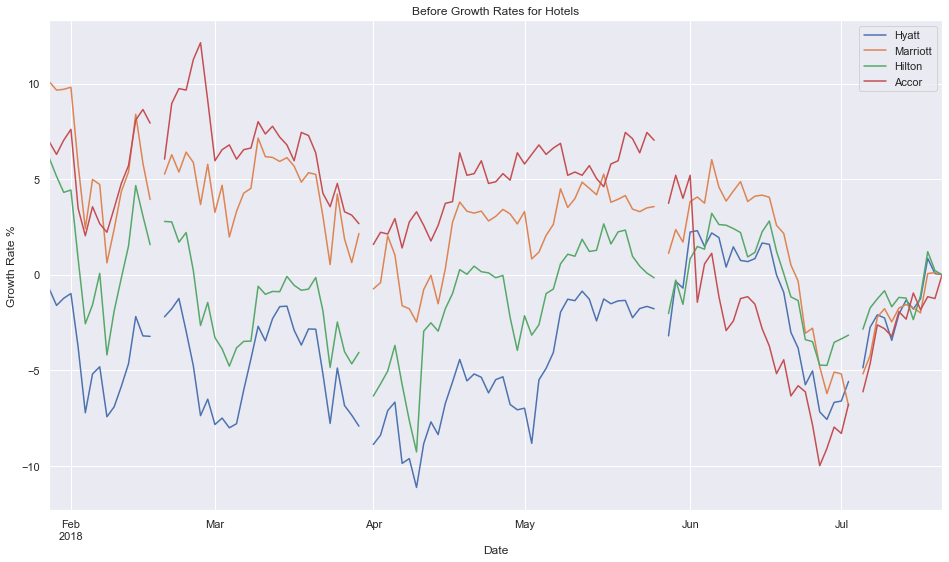

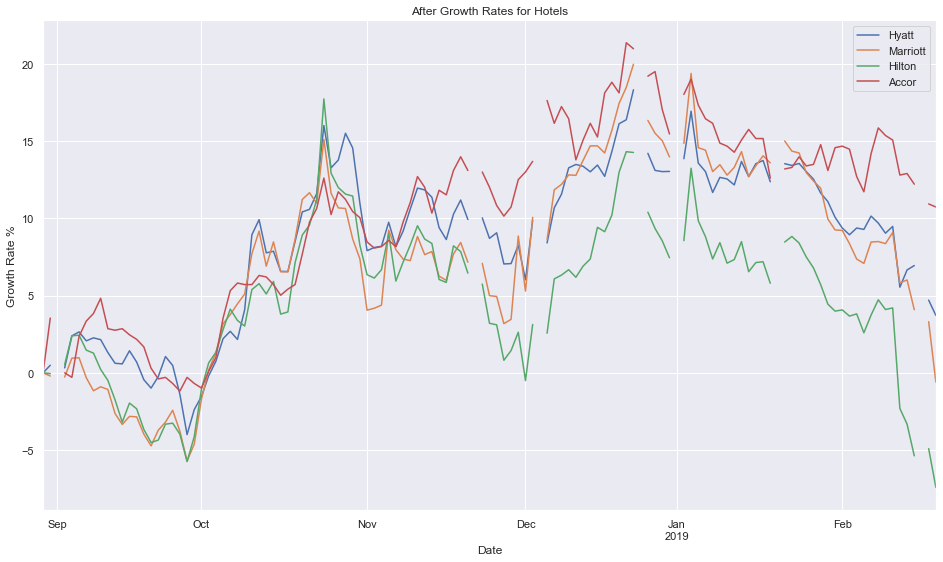

In [27]:
# plot the before growth rates for hotels
before_growth_rate2[hotels].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Hotels')

# plot the after growth rates for hotels
after_growth_rate2[hotels].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Hotels');

Determine the optimal days to buy and sell insurance stocks.

In [28]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(carr_fire_dates[0] - before_growth_rate2[insurance].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate2[insurance].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate2[insurance].idxmax() - carr_fire_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate2[insurance].max())

Optimal number of days before the event to purchase the stock.
Allstate    173 days
Travelers   172 days
Chubb       173 days
Erie         31 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate      5.416623
Travelers    16.533335
Chubb        14.678193
Erie          0.620707
dtype: float64 

Optimal number of days after the event to sell the stock.
Allstate    116 days
Travelers   116 days
Chubb       116 days
Erie         46 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     22.753176
Travelers    14.447397
Chubb        11.069177
Erie          4.044962
dtype: float64


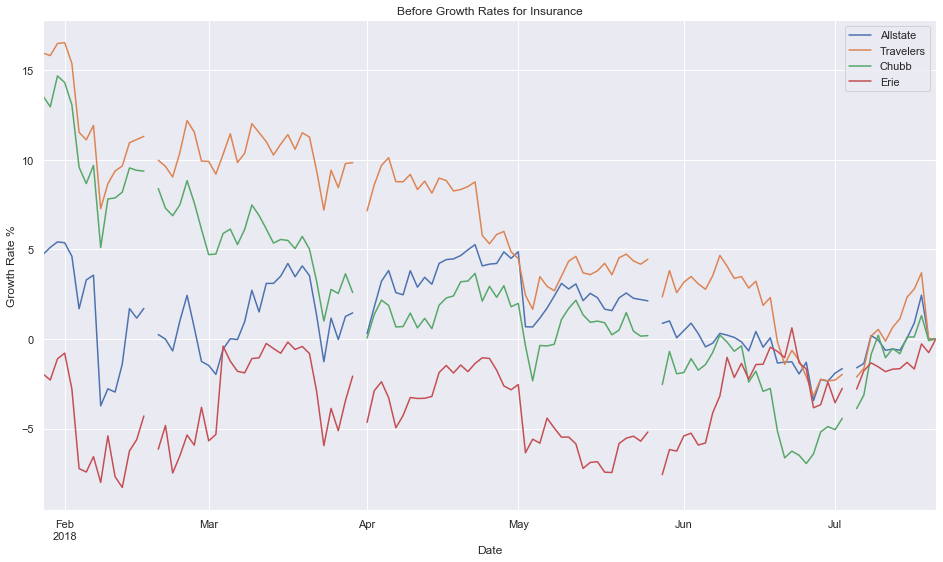

In [29]:
# plot the before growth rates for insurance
before_growth_rate2[insurance].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Insurance')

# plot the after growth rates for insurance
after_growth_rate2[insurance].plot(figsize = (16, 9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Insurance');

#### Visualizing the hurricane Maria growth rates by sector.

In [30]:
# select the stock prices before and after the hurricane
before3 = closing_prices.loc[maria_hurr_6months_before]
after3 = closing_prices.loc[maria_hurr_6months_after]

# apply the growth rate functions
before_growth_rate3 = before3.apply(backward_growth_rate)
after_growth_rate3 = after3.apply(forward_growth_rate)

Determine the optimal days to buy and sell car rental stocks.

In [31]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(maria_hurricane_dates[0] - before_growth_rate3[car_rental].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate3[car_rental].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate3[car_rental].idxmax() - maria_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate3[car_rental].max())

Optimal number of days before the event to purchase the stock.
Hertz   5 days
Avis    5 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    14.040954
Avis      7.112635
dtype: float64 

Optimal number of days after the event to sell the stock.
Hertz   44 days
Avis    43 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    27.180357
Avis     16.641064
dtype: float64


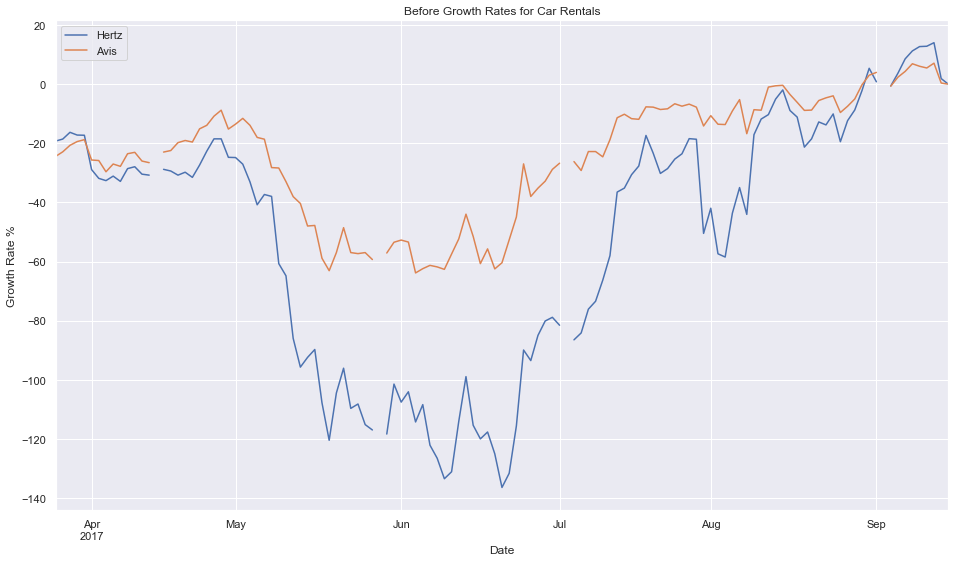

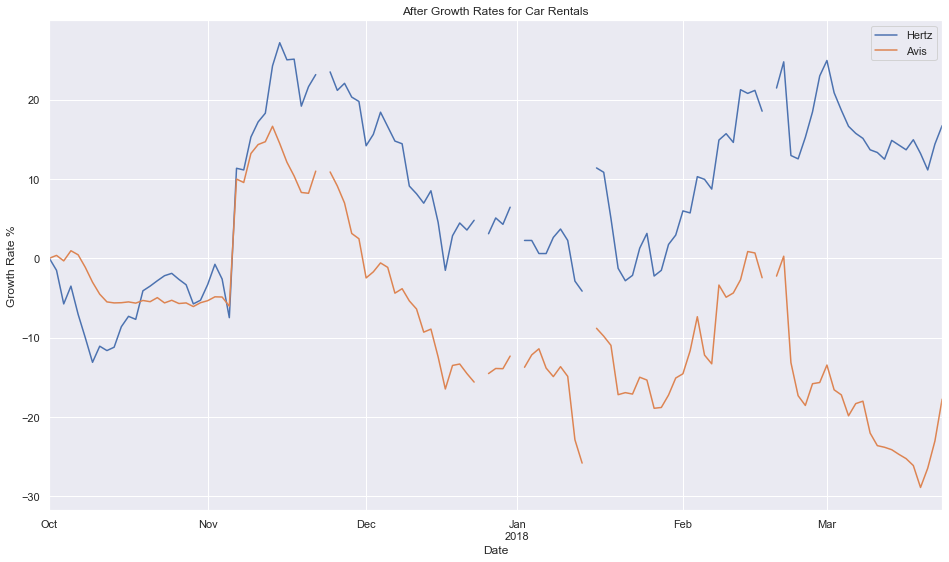

In [32]:
# plot the before growth rates for car rentals
before_growth_rate3[car_rental].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Car Rentals')

# plot the after growth rates for car rentals
after_growth_rate3[car_rental].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Car Rentals');

Determine the optimal days to buy and sell car logistics stocks.

In [33]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(maria_hurricane_dates[0] - before_growth_rate3[logistics].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate3[logistics].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate3[logistics].idxmax() - maria_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate3[logistics].max())

Optimal number of days before the event to purchase the stock.
XPO_Logistics   81 days
J_B_Hunt        10 days
UPS              3 days
DHL              5 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    6.068561
J_B_Hunt         0.265118
UPS              0.000000
DHL              0.277006
dtype: float64 

Optimal number of days after the event to sell the stock.
XPO_Logistics    15 days
J_B_Hunt         46 days
UPS             172 days
DHL             172 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics     3.823835
J_B_Hunt          6.927237
UPS              15.837401
DHL               4.102565
dtype: float64


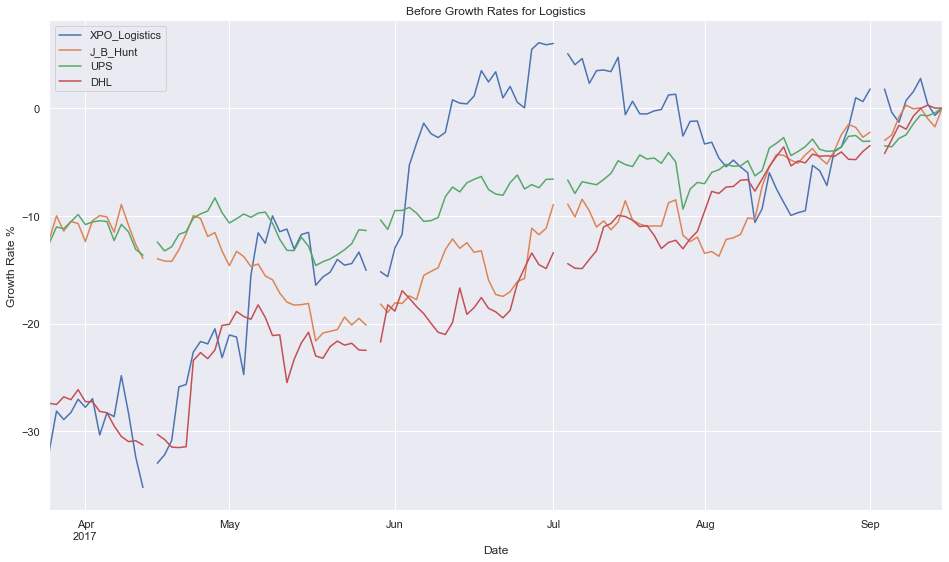

In [34]:
# plot the before growth rates for logistics
before_growth_rate3[logistics].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Logistics')

# plot the after growth rates for logistics
after_growth_rate3[logistics].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Logistics');

Determine the optimal days to buy and sell building materials stocks.

In [35]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(maria_hurricane_dates[0] - before_growth_rate3[building_materials].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate3[building_materials].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate3[building_materials].idxmax() - maria_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate3[building_materials].max())

Optimal number of days before the event to purchase the stock.
Home_Depot      5 days
Lowes         131 days
Walmart        40 days
Builders_FS     6 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot     1.012380
Lowes          9.377179
Walmart        1.507172
Builders_FS    4.532080
dtype: float64 

Optimal number of days after the event to sell the stock.
Home_Depot    31 days
Lowes         31 days
Walmart        0 days
Builders_FS   15 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot     0.798682
Lowes          5.124396
Walmart        0.000000
Builders_FS    3.494921
dtype: float64


In [36]:
# plot the before growth rates for building materials
before_growth_rate3[building_materials].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Building Materials')

# plot the after growth rates for building materials
after_growth_rate3[building_materials].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Building Materials');

Determine the optimal days to buy and sell hotel stocks.

In [37]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(maria_hurricane_dates[0] - before_growth_rate3[hotels].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate3[hotels].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate3[hotels].idxmax() - maria_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate3[hotels].max())

Optimal number of days before the event to purchase the stock.
Hyatt       42 days
Marriott   108 days
Hilton     108 days
Accor      108 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt       0.099045
Marriott    4.243139
Hilton      1.157108
Accor       2.238050
dtype: float64 

Optimal number of days after the event to sell the stock.
Hyatt       1 days
Marriott    2 days
Hilton      1 days
Accor      44 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt       0.952847
Marriott    1.547090
Hilton      0.820970
Accor       1.825551
dtype: float64


In [38]:
# plot the before growth rates for hotels
before_growth_rate3[hotels].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Hotels')

# plot the after growth rates for hotels
after_growth_rate3[hotels].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Hotels');

Determine the optimal days to buy and sell insurance stocks.

In [39]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(maria_hurricane_dates[0] - before_growth_rate3[insurance].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate3[insurance].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate3[insurance].idxmax() - maria_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate3[insurance].max())

Optimal number of days before the event to purchase the stock.
Allstate    40 days
Travelers   40 days
Chubb       46 days
Erie        52 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     4.033791
Travelers    7.260851
Chubb        4.243678
Erie         8.220664
dtype: float64 

Optimal number of days after the event to sell the stock.
Allstate    129 days
Travelers     0 days
Chubb       172 days
Erie        134 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     2.511366
Travelers    0.000000
Chubb        7.505669
Erie         9.610369
dtype: float64


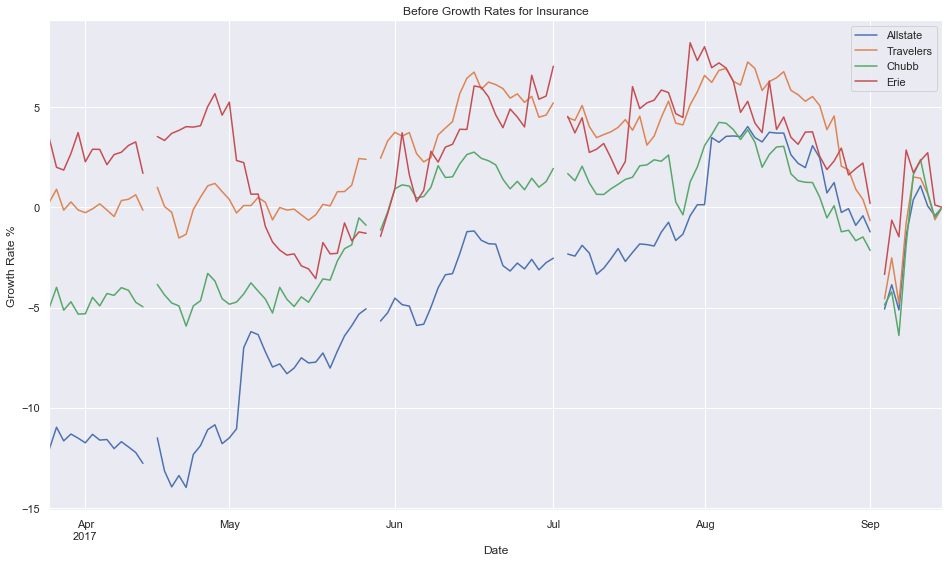

In [40]:
# plot the before growth rates for insurance
before_growth_rate3[insurance].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Insurance')

# plot the after growth rates for insurance
after_growth_rate3[insurance].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Insurance');

#### Visualizing the hurricane Harvey growth rates by sector.

In [41]:
# select the stock prices before and after the hurricane
before4 = closing_prices.loc[harvey_hurr_6months_before]
after4 = closing_prices.loc[harvey_hurr_6months_after]

# apply the growth rate functions
before_growth_rate4 = before4.apply(backward_growth_rate)
after_growth_rate4 = after4.apply(forward_growth_rate)

Determine the optimal days to buy and sell car rental stocks.

In [42]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(harvey_hurricane_dates[0] - before_growth_rate4[car_rental].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate4[car_rental].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate4[car_rental].idxmax() - harvey_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate4[car_rental].max())

Optimal number of days before the event to purchase the stock.
Hertz   167 days
Avis      2 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    18.822522
Avis      2.999998
dtype: float64 

Optimal number of days after the event to sell the stock.
Hertz   75 days
Avis    74 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hertz    17.068466
Avis     11.013935
dtype: float64


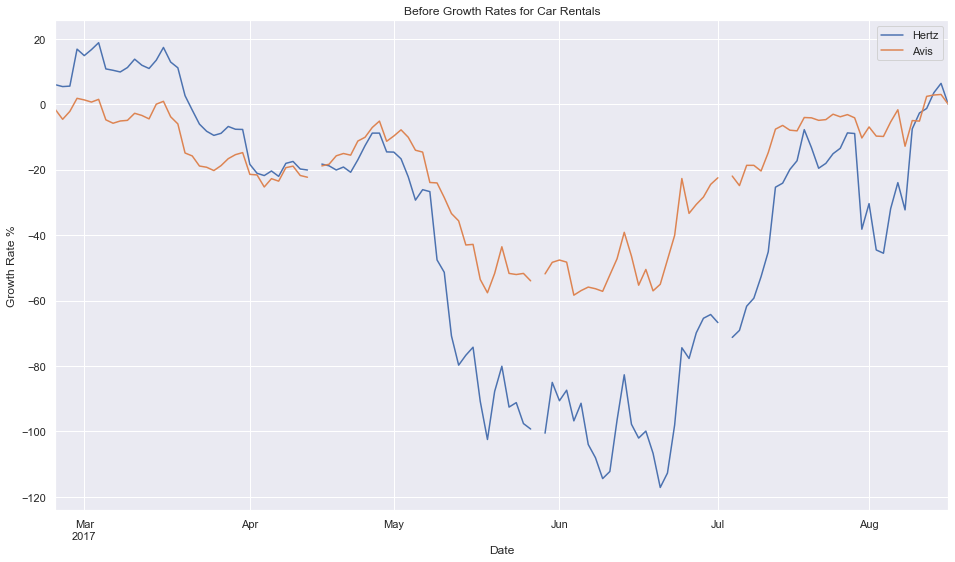

In [43]:
# plot the before growth rates for rental cars
before_growth_rate4[car_rental].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Car Rentals')

# plot the after growth rates for rental cars
after_growth_rate4[car_rental].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Car Rentals');

Determine the optimal days to buy and sell logistics stocks.

In [44]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(harvey_hurricane_dates[0] - before_growth_rate4[logistics].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate4[logistics].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate4[logistics].idxmax() - harvey_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate4[logistics].max())

Optimal number of days before the event to purchase the stock.
XPO_Logistics    49 days
J_B_Hunt        169 days
UPS               1 days
DHL               1 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    13.634962
J_B_Hunt          2.836026
UPS               0.000000
DHL               0.000000
dtype: float64 

Optimal number of days after the event to sell the stock.
XPO_Logistics     6 days
J_B_Hunt          4 days
UPS             173 days
DHL               4 days
dtype: timedelta64[ns] 

The optimal growth rate.
XPO_Logistics    3.051832
J_B_Hunt         0.744839
UPS              8.471022
DHL              0.718561
dtype: float64


In [45]:
# plot the before growth rates for logistics
before_growth_rate4[logistics].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Logistics')

# plot the after growth rates for logistics
after_growth_rate4[logistics].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Logistics');

Determine the optimal days to buy and sell building materials stocks.

In [46]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(harvey_hurricane_dates[0] - before_growth_rate4[building_materials].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate4[building_materials].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate4[building_materials].idxmax() - harvey_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate4[building_materials].max())

Optimal number of days before the event to purchase the stock.
Home_Depot    59 days
Lowes         99 days
Walmart        8 days
Builders_FS   13 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot      4.130721
Lowes          12.444805
Walmart         0.771961
Builders_FS     3.588508
dtype: float64 

Optimal number of days after the event to sell the stock.
Home_Depot     0 days
Lowes          0 days
Walmart       28 days
Builders_FS   14 days
dtype: timedelta64[ns] 

The optimal growth rate.
Home_Depot     0.000000
Lowes          0.000000
Walmart        0.293484
Builders_FS    2.230264
dtype: float64


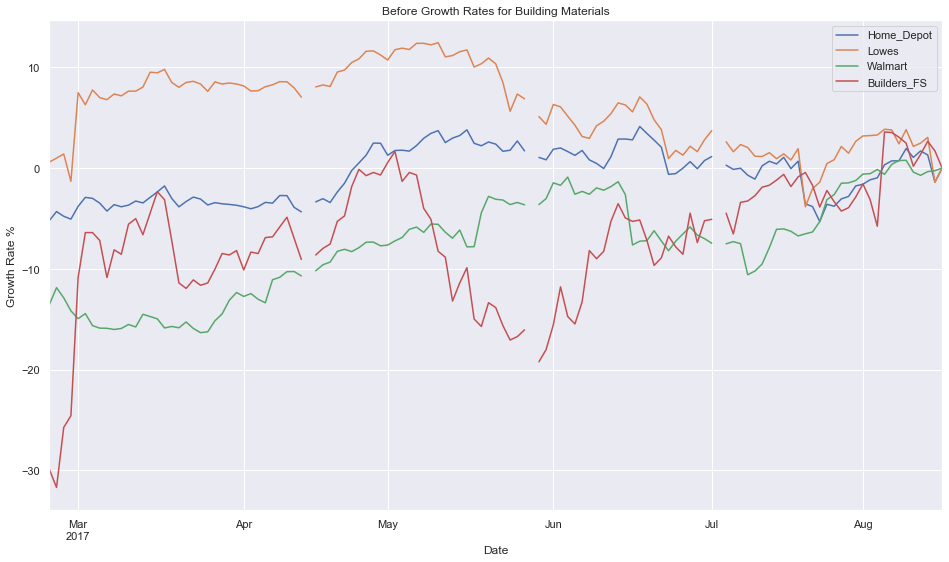

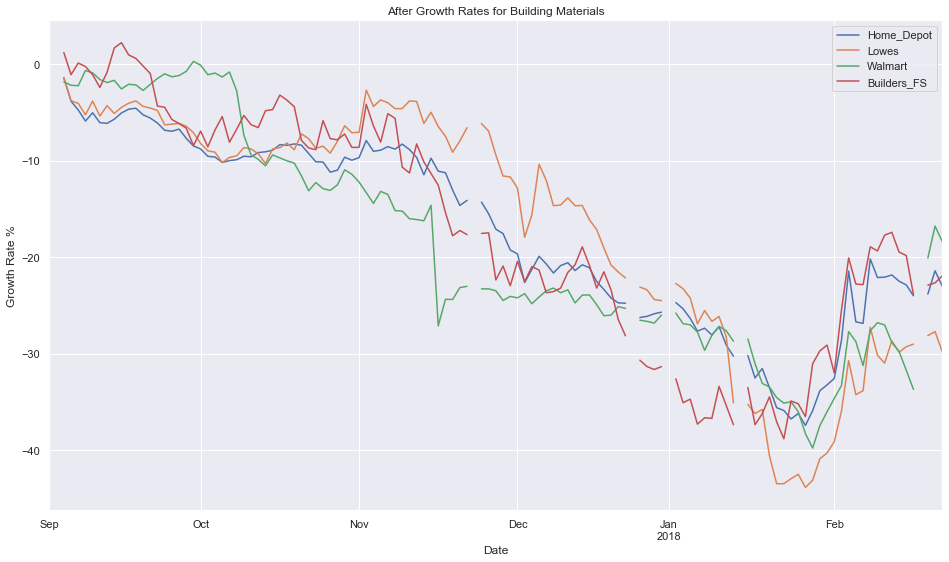

In [47]:
# plot the before growth rates for building materials
before_growth_rate4[building_materials].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Building Materials')

# plot the after growth rates for building materials
after_growth_rate4[building_materials].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Building Materials');

Determine the optimal days to buy and sell hotel stocks.

In [48]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(harvey_hurricane_dates[0] - before_growth_rate4[hotels].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate4[hotels].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate4[hotels].idxmax() - harvey_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate4[hotels].max())

Optimal number of days before the event to purchase the stock.
Hyatt      10 days
Marriott   76 days
Hilton     76 days
Accor      76 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt       6.421266
Marriott    8.867885
Hilton      7.372800
Accor       5.900304
dtype: float64 

Optimal number of days after the event to sell the stock.
Hyatt      4 days
Marriott   6 days
Hilton     4 days
Accor      0 days
dtype: timedelta64[ns] 

The optimal growth rate.
Hyatt       1.709689
Marriott    1.965319
Hilton      1.532742
Accor       0.000000
dtype: float64


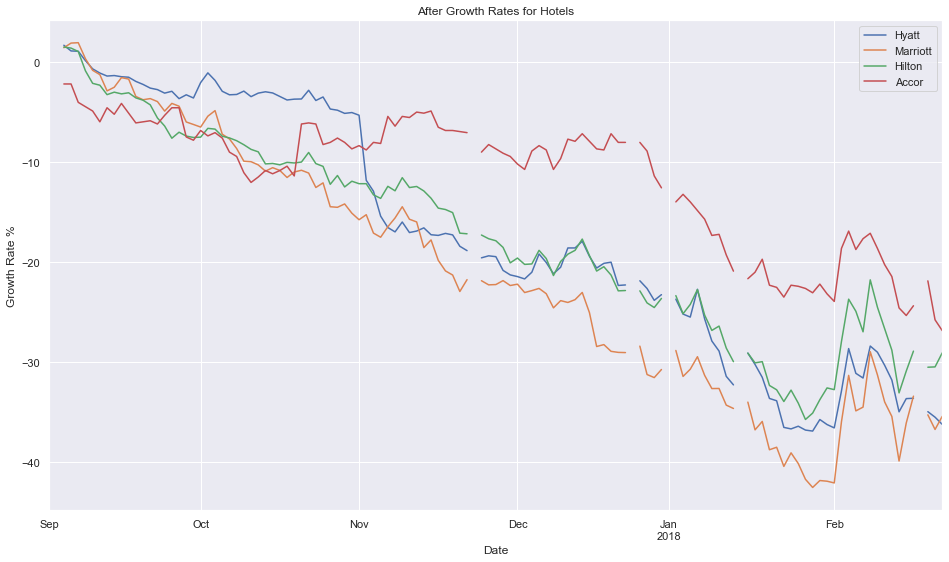

In [49]:
# plot the before growth rates for hotels
before_growth_rate4[hotels].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Hotels')


# plot the after growth rates for hotels
after_growth_rate4[hotels].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Hotels');

Determine the optimal days to buy and sell insurance stocks.

In [50]:
# optimal number of days before the event to purchase the stock
print('Optimal number of days before the event to purchase the stock.')
print(harvey_hurricane_dates[0] - before_growth_rate4[insurance].idxmax(), '\n')

# optimal growth rate
print('The optimal growth rate.')
print(before_growth_rate4[insurance].max(), '\n')

# optimal number of days after the event to sell the stock
print('Optimal number of days after the event to sell the stock.')
print(after_growth_rate4[insurance].idxmax() - harvey_hurricane_dates[-1], '\n')

# optimal growth rate
print('The optimal growth rate.')
print(after_growth_rate4[insurance].max())

Optimal number of days before the event to purchase the stock.
Allstate     8 days
Travelers    8 days
Chubb       14 days
Erie        20 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     0.337909
Travelers    0.522468
Chubb        1.234397
Erie         3.885004
dtype: float64 

Optimal number of days after the event to sell the stock.
Allstate      6 days
Travelers     6 days
Chubb         6 days
Erie        165 days
dtype: timedelta64[ns] 

The optimal growth rate.
Allstate     3.709069
Travelers    3.936615
Chubb        3.993167
Erie         6.303337
dtype: float64


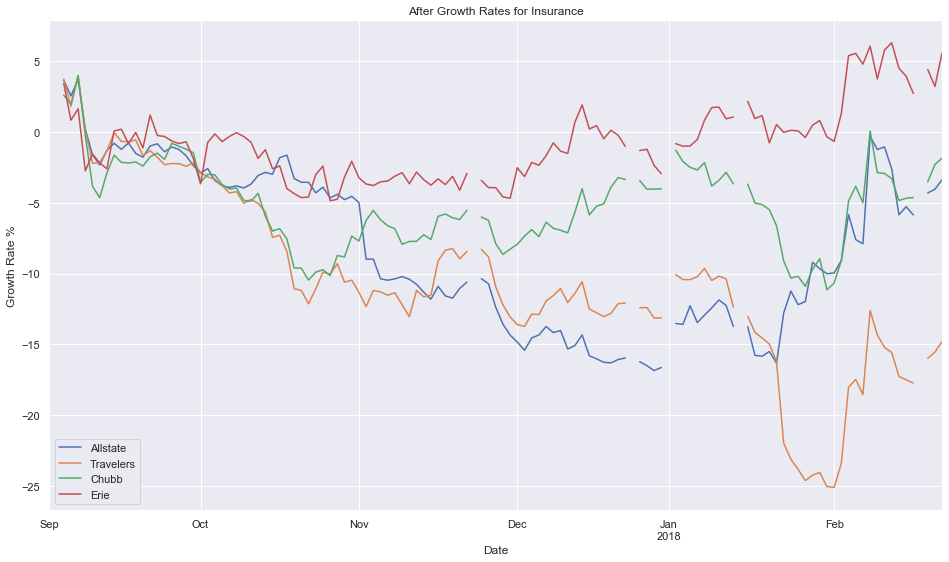

In [51]:
# plot the before growth rates for insurance
before_growth_rate4[insurance].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('Before Growth Rates for Insurance')

# plot the after growth rates for insurance
after_growth_rate4[insurance].plot(figsize=(16,9))
plt.ylabel("Growth Rate %")
plt.title('After Growth Rates for Insurance');

#### Aggregate the optimal days into a dataframe.

We expect to see the growth rates of the baskets of stocks peaking on approximately the same days if they are being influenced by the environmental events. To visualize this affect, we start by creating a dataframe of the optimal days.

In [52]:
# create an array of optimal days
days = np.array([[79,175,42,149,64,170,58,48,1,149,157,155,155,171,49,48,50,1],
                 [31,41,20,31,31,31,31,31,31,31,31,31,28,171,31,31,31,31],
                 [175,125,41,41,175,175,175,175,175,172,49,175,175,146,173,172,173,31],
                 [55,126,105,116,116,116,116,116,116,116,116,116,55,113,116,116,116,46],
                 [5,5,81,10,3,5,5,131,40,6,42,108,108,108,40,40,46,52],
                 [44,43,15,46,172,173,31,31,0,15,1,2,1,44,129,0,172,134],
                 [167,2,49,169,1,1,59,99,8,13,10,76,76,76,8,8,14,20],
                 [75,74,6,4,173,4,0,0,28,14,4,6,4,0,6,6,6,165]])

# create a multilevel index
index = pd.MultiIndex.from_product([['Camp_Fire', 'Carr_Fire', 'Hurricane_Maria', 'Hurricane_Harvey'],
                                    ['Before', 'After']])

# create the dataframe
optimal_days = pd.DataFrame(days, index=index, columns=stocknames)
optimal_days

Hertz  Avis  XPO_Logistics  J_B_Hunt  UPS  DHL  \
Camp_Fire        Before     79   175             42       149   64  170   
                 After      31    41             20        31   31   31   
Carr_Fire        Before    175   125             41        41  175  175   
                 After      55   126            105       116  116  116   
Hurricane_Maria  Before      5     5             81        10    3    5   
                 After      44    43             15        46  172  173   
Hurricane_Harvey Before    167     2             49       169    1    1   
                 After      75    74              6         4  173    4   

                         Home_Depot  Lowes  Walmart  Builders_FS  Hyatt  \
Camp_Fire        Before          58     48        1          149    157   
                 After           31     31       31           31     31   
Carr_Fire        Before         175    175      175          172     49   
                 After          116    116      116          116    116   
Hurricane_Maria  Before           5    131       40            6     42   
                 After           31     31        0           15      1   
Hurricane_Harvey Before          59     99        8           13     10   
                 After            0      0       28           14      4   

                         Marriott  Hilton  Accor  Allstate  Travelers  Chubb  \
Camp_Fire        Before       155     155    171        49         48     50   
                 After         31      28    171        31         31     31   
Carr_Fire        Before       175     175    146       173        172    173   
                 After        116      55    113       116        116    116   
Hurricane_Maria  Before       108     108    108        40         40     46   
                 After          2       1     44       129          0    172   
Hurricane_Harvey Before        76      76     76         8          8     14   
                 After          6       4      0         6          6      6   

                         Erie  
Camp_Fire        Before     1  
                 After     31  
Carr_Fire        Before    31  
                 After     46  
Hurricane_Maria  Before    52  
                 After    134  
Hurricane_Harvey Before    20  
                 After    165

Next we create histograms that show the frequency counts of stocks that achieve peak growth rates on or near the same day. The histrograms are overlapping and depict the environmental events grouped by type on the same graph.

In [53]:
# wildfires before
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.figure(figsize=(16, 9))
plt.hist(optimal_days.loc['Camp_Fire', 'Before'], label='Camp Fire Before', **kwargs)
plt.hist(optimal_days.loc['Carr_Fire', 'Before'], label='Carr Fire Before', **kwargs)
plt.xlabel('Number of days before event')
plt.ylabel('Frequency Count')
plt.title('Optimal Number of Days to Buy Stock Prior to Event')
plt.legend(loc='upper left');

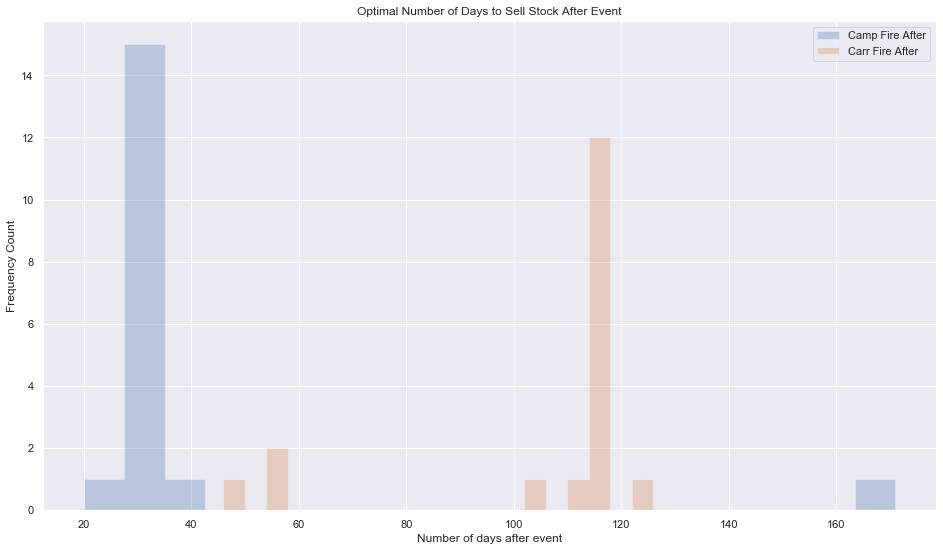

In [54]:
# wildfires after
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.figure(figsize=(16, 9))
plt.hist(optimal_days.loc['Camp_Fire', 'After'], label='Camp Fire After', **kwargs)
plt.hist(optimal_days.loc['Carr_Fire', 'After'], label='Carr Fire After', **kwargs)
plt.xlabel('Number of days after event')
plt.ylabel('Frequency Count')
plt.title('Optimal Number of Days to Sell Stock After Event')
plt.legend();

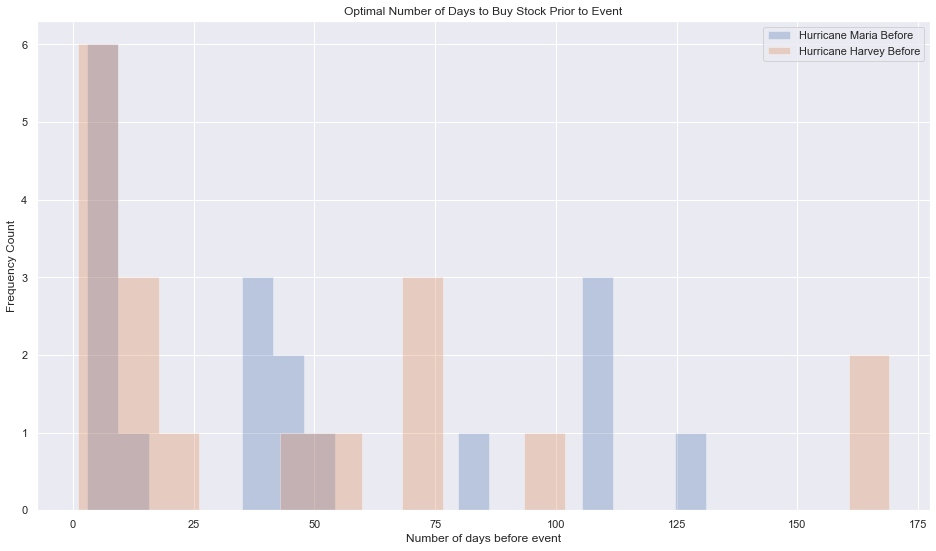

In [55]:
# hurricanes before
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.figure(figsize=(16, 9))
plt.hist(optimal_days.loc['Hurricane_Maria', 'Before'], label='Hurricane Maria Before', **kwargs)
plt.hist(optimal_days.loc['Hurricane_Harvey', 'Before'], label='Hurricane Harvey Before', **kwargs)
plt.xlabel('Number of days before event')
plt.ylabel('Frequency Count')
plt.title('Optimal Number of Days to Buy Stock Prior to Event')
plt.legend();

In [56]:
# hurricanes after
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)
plt.figure(figsize=(16, 9))
plt.hist(optimal_days.loc['Hurricane_Maria', 'After'], label='Hurricane Maria After', **kwargs)
plt.hist(optimal_days.loc['Hurricane_Harvey', 'After'], label='Hurricane Harvey After', **kwargs)
plt.xlabel('Number of days after event')
plt.ylabel('Frequency Count')
plt.title('Optimal Number of Days to Sell Stock After Event')
plt.legend();

#### T-tests for before and after maximum growth rates.

We conduct two-sided t-tests to determine if there is a statistically significant difference between the before and after maximum growth rates for each event.

In [57]:
# two-sided t-test for before and after "Camp" wildfire maximum growth rates
camp_ttest = stats.ttest_ind(before_growth_rate1[stocknames].max(), after_growth_rate1[stocknames].max())

# two-sided t-test for before and after "Carr" wildfire maximum growth rates
carr_ttest = stats.ttest_ind(before_growth_rate2[stocknames].max(), after_growth_rate2[stocknames].max())

# two-sided t-test for before and after hurricane Maria maximum growth rates
maria_ttest = stats.ttest_ind(before_growth_rate3[stocknames].max(), after_growth_rate3[stocknames].max())

# two-sided t-test for before and after hurricane Harvey maximum growth rates
harvey_ttest = stats.ttest_ind(before_growth_rate4[stocknames].max(), after_growth_rate4[stocknames].max())

print('"Camp" wildfire t-test statistic = {:.4f}, pvalue = {:.4f}'.format(camp_ttest[0], camp_ttest[1]))
print('"Carr" wildfire t-test statistic = {:.4f}, pvalue = {:.4f}'.format(carr_ttest[0], carr_ttest[1]))
print('Hurricane Maria t-test statistic = {:.4f}, pvalue = {:.4f}'.format(maria_ttest[0], maria_ttest[1]))
print('Hurricane Harvey t-test statistic = {:.4f}, pvalue = {:.4f}'.format(harvey_ttest[0], harvey_ttest[1]))

"Camp" wildfire t-test statistic = 0.0913, pvalue = 0.9278
"Carr" wildfire t-test statistic = -2.3722, pvalue = 0.0235
Hurricane Maria t-test statistic = -0.9469, pvalue = 0.3504
Hurricane Harvey t-test statistic = 0.9136, pvalue = 0.3673


In only one case, the "Carr" wildfire, did the average of the maximum growth rates differ before and after the event.

### 4) Findings

We see from the histograms above that only in four instances did at least 50% of the selected stocks achieve peak growth rates within +/-3 days of one another. Of those instances, none of the peaks occurred on or near the same approximate number of days before or after the event. We also found that in only one case did the before and after maximum growth rates differ.

| Event            | Before/After | % of Stocks Peaking Within +/-3 Days of Each Other | Approx. # of Days Before/After Event |
|------------------|--------------|----------------------------------------------------|--------------------------------------|
| "Camp" wildfire  | After        |                         83%                        | 30                                   |
| "Carr" wildfire  | Before       |                         66%                        | 175                                  |
| "Carr" wildfire  | After        |                         66%                        | 115                                  |
| Hurricane Harvey | After        |                         66%                        | 5                                    |

However, when we take a closer look at each basket of stocks, we find that in a number of instances at least three out of the four stocks in each basket (two out of two for rental car) achieve peak growth rates within +/-3 days of one another. The check marks indicate where this occurred.  

| Event            | Before/After | Rental Car | Logistics | Building Materials | Hotels | Insurance |
|------------------|--------------|------------|-----------|--------------------|--------|-----------|
| "Camp" wildfire  | Before       |            |           |                    |    ✔   |     ✔     |
|                  | After        |            |     ✔     |          ✔         |        |     ✔     |
| "Carr" wildfire  | Before       |            |           |          ✔         |        |     ✔     |
|                  | After        |            |     ✔     |          ✔         |    ✔   |     ✔     |
| Hurricane Maria  | Before       |      ✔     |           |                    |    ✔   |           |
|                  | After        |      ✔     |           |                    |    ✔   |           |
| Hurricane Harvey | Before       |            |           |                    |    ✔   |           |
|                  | After        |      ✔     |     ✔     |                    |    ✔   |     ✔     |  

Of interest, the insurance basket of stocks peaked on similar days both before and after both wildfires, and the hotel basket of stocks peaked on similar days both before and after both hurricanes. The rental car basket of stocks peaked in three out of the four hurricane timeframes and the building materials basket of stocks peaked in three out of the four wildfire timeframes. Each of these findings warrants further research.

### 5) Conclusion

Overall, we found little predictability in the macro movement of our selected stocks in response to environmental events. However, the response from insurance and building materials, and hotel and rental car stocks in response to wildfires and hurricanes, respectively, deserves additional study.  

Additionally, during our initial research we found that several of the largest rental car, building materials, and insurance companies are privately owned. These companies might be affected by environmental events, but data concerning this phenomena are not publicly available. The spontaneity of wildfires as compared to the predictability of hurricanes along with other external factors may also play a role in influencing stock prices that is not captured in our research.